In [1]:
# Imports
#%matplotlib qt
%matplotlib inline
import sys
import os
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib import cm
import scipy
from collections import Counter

import mne
from fooof import FOOOF
from fooof import FOOOFGroup
from fooof.analysis import *

In [2]:
fg = FOOOFGroup()

In [3]:
# Set up paths

# This base path will need updating
base_path = 'D:\\abc\\Documents\\Research\\PBA_Data'

# These should stay the same
#subj_dat_fname = '._3001_resampled.set'
subj_dat_fname = '3014_resampled.set'

In [4]:
ev_dict = {
    # Recording Blocks
    'Recording_Start': 1000,
    'Recording_End': 1001,
    
    # Instruction Blocks
    'Instructions_Start':2000,
    'Instructions_End': 2001,
    
    # Rest Blocks 
    'Rest_Start':3000,
    'Rest_End':3001,
    
    # Threshold Blocks
    'Thresh_Block_Start':4000,
    'Thresh_Block_End': 4001,
    
    # Experiment Blocks
    'Exp_Block_Start':5000,
    'Exp_Block_End': 5001,
    
    # Trial Markers
    'Con_{}_Loc_{}': 6000,
    'Fix_On':6001,
    'Lines_On':6002,
    'Flash':6003,
    'Catch_Trail': 6004,
    'Saw':6005,
    'Missed':6006
}


In [5]:
# Read in subject listed above
full_path = os.path.join(base_path, subj_dat_fname)
eeg_dat = mne.io.read_raw_eeglab(full_path, event_id_func=None, preload=True)

<ipython-input-5-d91f2579a730>:3: DeprecationWarning: stim_channel (default True in 0.17) will change to False in 0.18 and be removed in 0.19, set it to False in 0.17 to avoid this warning
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id_func=None, preload=True)


Reading D:\abc\Documents\Research\PBA_Data\3014_resampled.fdt
Reading 0 ... 1916176  =      0.000 ...  3832.352 secs...
Used Annotations descriptions: []
Returning empty stim channel. Some annotations werefound but dropped during build of the raw.Please use `event_id` and `event_id_func` to drivethe selection/rejection of events


<ipython-input-5-d91f2579a730>:3: RuntimeWarning: 6512/6512 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id_func=None, preload=True)


In [6]:
eeg_dat.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 65
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : Non

In [7]:
evs = mne.io.eeglab.read_events_eeglab(full_path, ev_dict)

C:\Users\abc\Anaconda3\lib\site-packages\mne\utils.py:876: DeprecationWarning: Function read_events_eeglab is deprecated; read_events_eeglab is deprecated from 0.17 and will be removed in 0.18. Please use read_annotations and create events using events_from_annotations.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-7-e55b000d48b3>:1: RuntimeWarning: Events like the following will be dropped entirely: ['Catch_instr', 'RETURN pressed', 'Flash_thresh', 'Flash_instr', 'Catch_thresh'], 10 in total
  evs = mne.io.eeglab.read_events_eeglab(full_path, ev_dict)
<ipython-input-7-e55b000d48b3>:1: RuntimeWarning: 1964/6512 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  evs = mne.io.eeglab.read_events_eeglab(full_path, ev_dict)


In [8]:
new_evs = np.empty(shape=(0, 3))
#for ev_code in [3000, 5000]:
for ev_label in ['Rest_Start', 'Exp_Block_Start']:
    ev_code = ev_dict[ev_label]
    temp = evs[evs[:, 2] == ev_code]
    new_evs = np.vstack([new_evs, temp])

In [9]:
new_evs
# Sanity check
# evs[evs[:, 2] == 5000]

array([[  24515.,       0.,    3000.],
       [ 824024.,       0.,    5000.],
       [ 915558.,       0.,    5000.],
       [1010954.,       0.,    5000.],
       [1104282.,       0.,    5000.],
       [1201081.,       0.,    5000.],
       [1293012.,       0.,    5000.],
       [1385804.,       0.,    5000.],
       [1477496.,       0.,    5000.],
       [1563031.,       0.,    5000.],
       [1653331.,       0.,    5000.],
       [1740563.,       0.,    5000.],
       [1826022.,       0.,    5000.]])

In [10]:
Counter(evs[:, 2])

Counter({3: 2,
         0: 2,
         1: 4,
         4: 2,
         1000: 1,
         3000: 1,
         3001: 1,
         2000: 1,
         34: 97,
         6001: 1124,
         6002: 1124,
         6006: 751,
         33: 93,
         13: 93,
         6005: 373,
         31: 92,
         32: 97,
         12: 93,
         14: 96,
         21: 94,
         11: 93,
         22: 93,
         24: 92,
         23: 91,
         2001: 1,
         4000: 6,
         4001: 6,
         5000: 12,
         5001: 12,
         1001: 1})

In [11]:
eeg_dat.add_events(new_evs)

In [12]:
eeg_dat.set_eeg_reference()
# set EEG average reference

Applying average reference.
Applying a custom EEG reference.


<RawEEGLAB  |  3014_resampled.fdt, n_channels x n_times : 65 x 1916177 (3832.4 sec), ~950.4 MB, data loaded>

In [13]:
events = mne.find_events(eeg_dat)
event_id = {'Rest_Start': 3000, 'Exp_Block_Start':5000}

epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id)

13 events found
Event IDs: [3000 5000]
13 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


# Marking bad channels
### Based on visualization.


In [14]:
eeg_dat.info['bads'] = ['TP9']

In [15]:
print('Bad channels: ', eeg_dat.info['bads'])

Bad channels:  ['TP9']


13 events found
Event IDs: [3000 5000]
Found %s events.



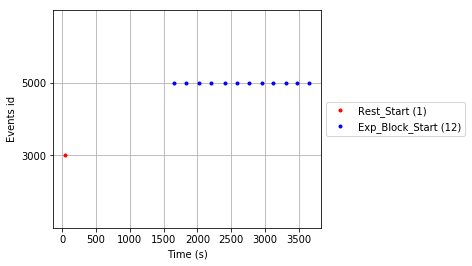

In [16]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Rest_Start': 3000, 'Exp_Block_Start':5000}
color = {3000:'red', 5000:'blue'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id);

# Marking bad moments
### Identifying bad moments based on visualization

In [17]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, tmin = 5, tmax = 115,
                    baseline = None, preload=True)

13 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 13 events and 55001 original time points ...
0 bad epochs dropped


In [18]:
chs = mne.channels.read_montage('standard_1020', epochs.ch_names[:-1])
epochs.set_montage(chs)

<Epochs  |   13 events (all good), 5 - 115 sec, baseline off, ~354.7 MB, data loaded,
 'Exp_Block_Start': 12
 'Rest_Start': 1>

In [19]:
epochs.drop_bad()

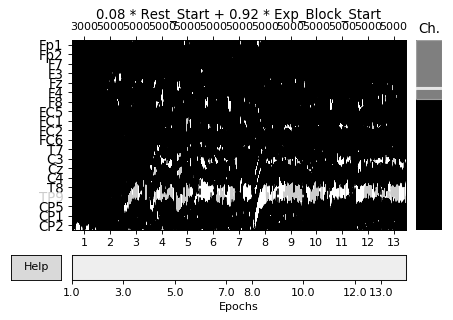

In [20]:
epochs.plot();

In [21]:
epochs._data.shape

(13, 65, 55001)

In [22]:
# Calculate PSD
psd, freqs = mne.time_frequency.psd_welch(epochs, fmin=1., fmax=50., n_fft=2000, n_overlap=250, n_per_seg=500)


Effective window size : 4.000 (s)


In [23]:
# Get freq res of PSD
f_res = np.mean(np.diff(freqs))

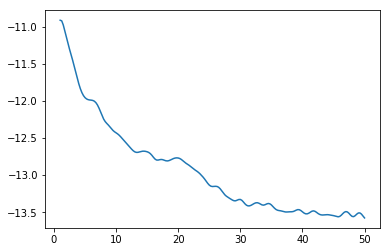

In [24]:
plt.plot(freqs, np.log10(psd[3, 30, :]))

# FOOOFing Data

In [25]:
fooof_psd = np.squeeze(psd[3,:,:])

In [26]:
fooof_psd.shape

(63, 197)

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 32 Hz                        
                                 Frequency Resolution is 0.25 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -10.8767, 1.4998                                         
                                                                                                  
                                       3 peaks were found:                                        
          

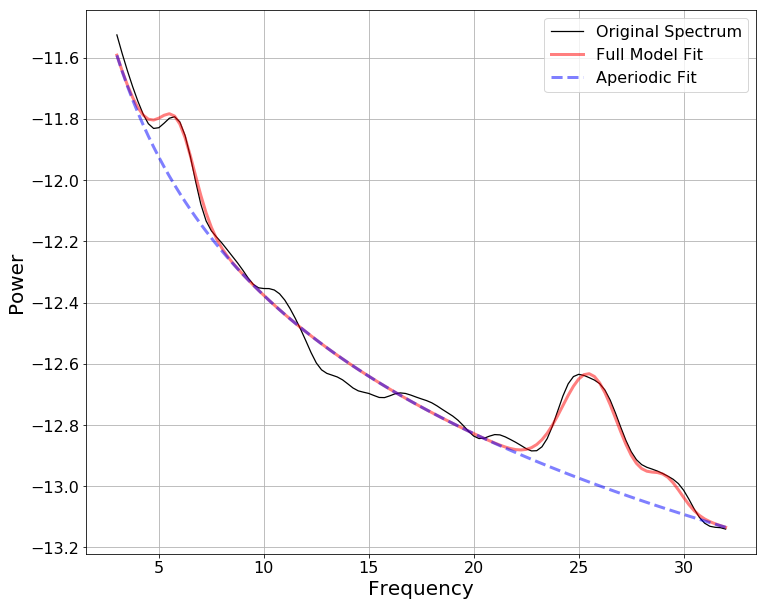

In [27]:
## Initialzing FOOOF model
fm = FOOOF(peak_width_limits=[1, 6], min_peak_height=0.075, max_n_peaks=6, peak_threshold=1)

# Setting frequency range
freq_range = [3, 32]

fm.report(freqs, fooof_psd[40, :], freq_range)

In [28]:
# Run FOOOF across a group of PSDs
fg = FOOOFGroup(verbose=False)
fg.fit(freqs, fooof_psd, freq_range)

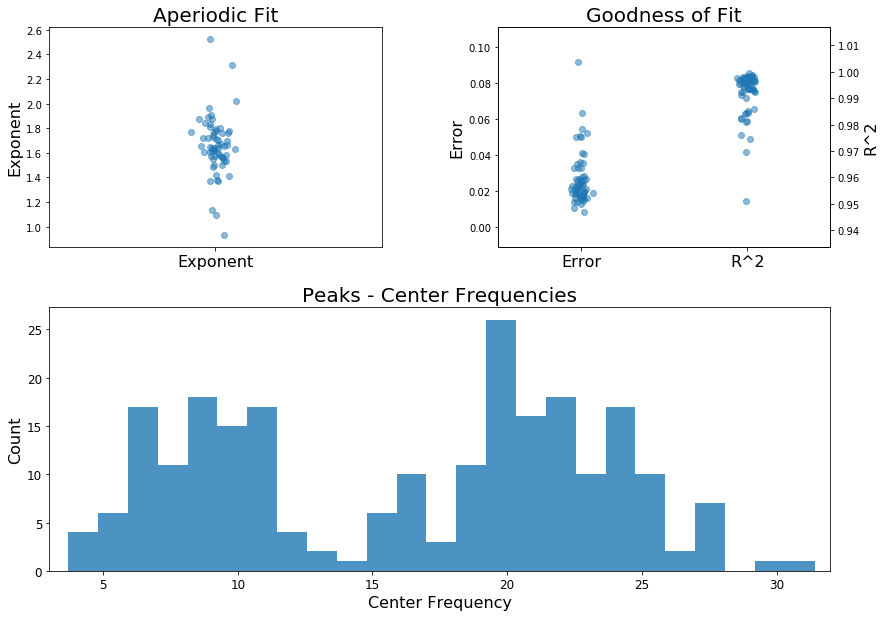

In [29]:
fg.plot()

In [30]:
n_channels, n_freq = fooof_psd.shape

In [31]:
fooof_results = np.zeros(shape = [n_channels,3])

In [32]:
for i, ch_dat in enumerate(fg.group_results):
    fooof_results[i,:] = get_band_peak(ch_dat.peak_params, [8, 12])

In [33]:
cfs = fooof_results[:, 0]
amps = fooof_results[:, 1]
bws = fooof_results[:,2]

In [34]:
cfs = np.nan_to_num(cfs)
amps = np.nan_to_num(amps)
bws = np.nan_to_num(bws)

In [35]:
# Define our oscillation bands
bands = [['Theta', [4, 8]], ['Alpha', [8, 12]]]

In [41]:
# DESIRED OUTPUT:
#  1d array, len of n_channels with osc_band freq for each channel
#  Note: deal with the band in channel: try out different markers for none (0, nan, etc.)

# Mapping

In [37]:
montage = mne.channels.read_montage('standard_1020', epochs.ch_names[:-1])
epochs.set_montage(montage)

<Epochs  |   13 events (all good), 5 - 115 sec, baseline off, ~354.7 MB, data loaded,
 'Exp_Block_Start': 12
 'Rest_Start': 1>

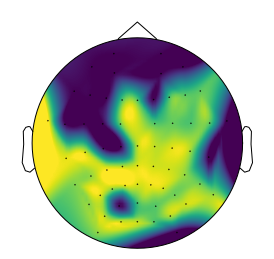

In [38]:
mne.viz.plot_topomap(cfs, epochs.info, cmap=cm.viridis, contours=0);

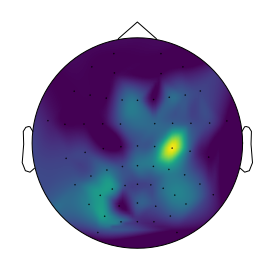

In [39]:
mne.viz.plot_topomap(amps, epochs.info, cmap=cm.viridis, contours=0);

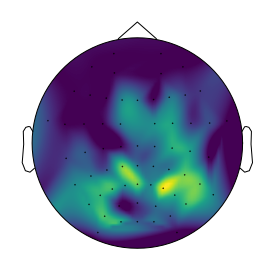

In [40]:
mne.viz.plot_topomap(bws, epochs.info, cmap=cm.viridis, contours=0);